<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [7]:
import numpy as np

def sum_prod(matrices, vectors):
    if len(matrices) != len(vectors):
        return "Количество матриц должно быть равно количеству векторов"
    
    result = np.zeros_like(vectors[0])  
    
    for matrix, vector in zip(matrices, vectors):
        result += np.matmul(matrix, vector)
    
    return result


def test_sum_prod():
    matrix1 = np.array([[1, 2], [3, 4]])
    matrix2 = np.array([[5, 6], [7, 8]])
    vector1 = np.array([[1], [2]])
    vector2 = np.array([[3], [4]])

    result = sum_prod([matrix1, matrix2], [vector1, vector2])
    expected_result = np.array([[44], [64]])

    assert np.array_equal(result, expected_result)

    print("Все тесты пройдены успешно!")


test_sum_prod()

Все тесты пройдены успешно!


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [15]:
def binarize(M, threshold):
    return (M > threshold).astype(int)
    
    
def test_binarize_matrix():
    matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    threshold = 0.5
    
    result = binarize(matrix, threshold)
    expected_result = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

    assert np.array_equal(result, expected_result)

    print("Все тесты пройдены успешно!")


test_binarize_matrix()

[[1 1 1]
 [1 1 1]
 [1 1 1]]
Все тесты пройдены успешно!


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [20]:
def unique_rows(mat):
    unique_elements = [np.unique(row) for row in mat]
    return unique_elements


def unique_columns(mat):
    unique_elements = [np.unique(col) for col in mat.T]
    return unique_elements


def test_unique_rows():
    matrix = np.array([[1, 2, 3], [4, 2, 6], [7, 8, 9]])
    result = unique_rows(matrix)
    expected_result = [np.array([1, 2, 3]), np.array([2, 4, 6]), np.array([7, 8, 9])]
    assert np.array_equal(result, expected_result)
    print("Тесты для unique_rows пройдены успешно!")


def test_unique_columns():
    matrix = np.array([[1, 2, 3], [4, 2, 6], [7, 8, 9]])
    result = unique_columns(matrix)
    expected_result = [np.array([1, 4, 7]), np.array([2, 8]), np.array([3, 6, 9])]

    for i in range(len(result)):
        np.testing.assert_array_equal(np.sort(result[i]), np.sort(expected_result[i]))
    print("Тесты для unique_columns пройдены успешно!")


test_unique_rows()
test_unique_columns()

Тесты для unique_rows пройдены успешно!
Тесты для unique_columns пройдены успешно!


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

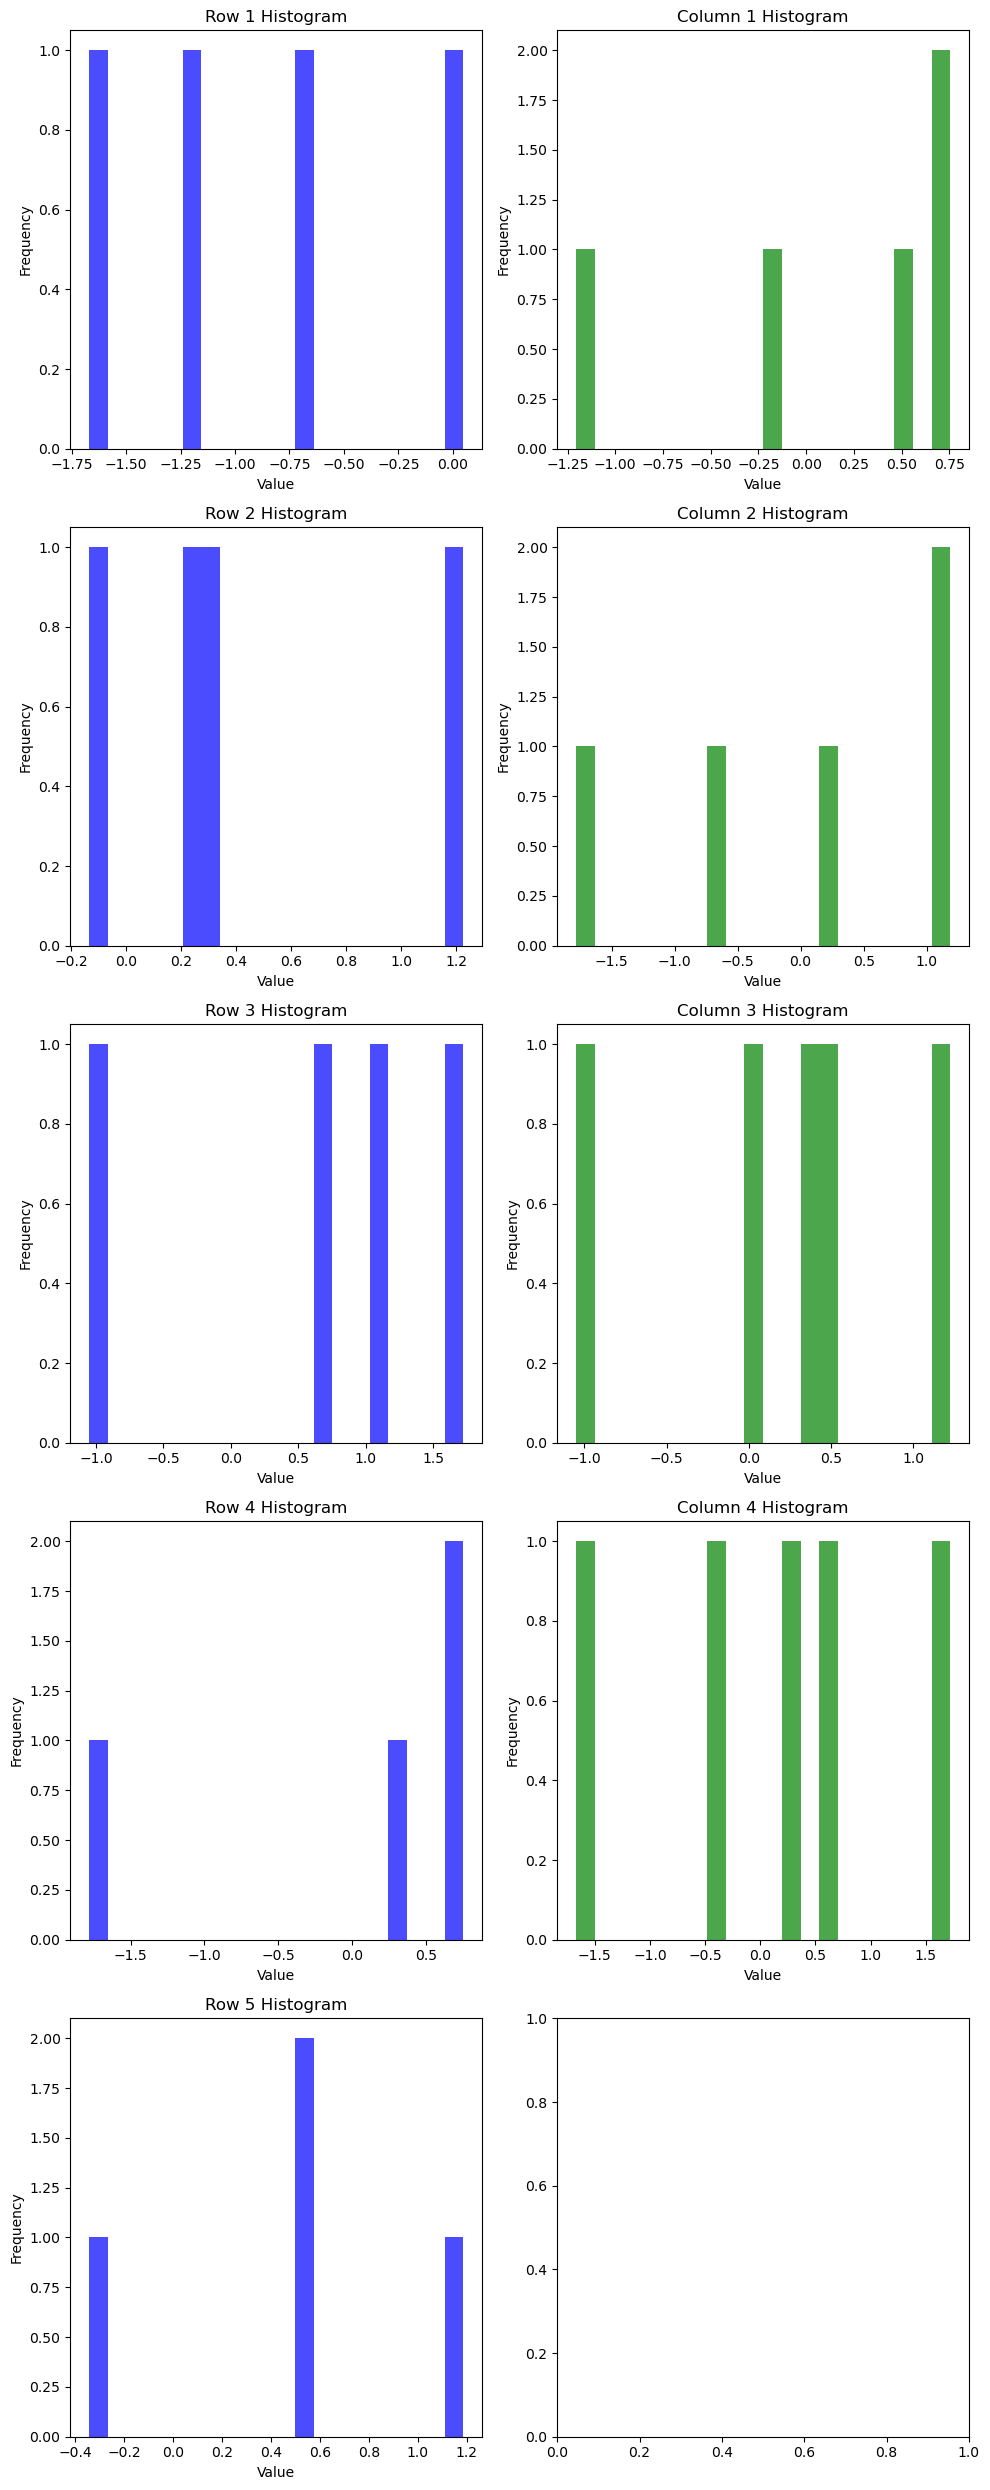

Строка 1: Мат. ожидание = -0.8681806742697027, Дисперсия = 0.41172628269515166
Строка 2: Мат. ожидание = 0.41881600779785794, Дисперсия = 0.24874345908677498
Строка 3: Мат. ожидание = 0.603514567645367, Дисперсия = 1.0517040307177585
Строка 4: Мат. ожидание = -0.00308822429961092, Дисперсия = 1.0811151183324845
Строка 5: Мат. ожидание = 0.47100519635298693, Дисперсия = 0.29467415624835
Столбец 1: Мат. ожидание = 0.12711749730256233, Дисперсия = 0.5435744880520034
Столбец 2: Мат. ожидание = 0.01356635688885155, Дисперсия = 1.2370010094514592
Столбец 3: Мат. ожидание = 0.20947227860813838, Дисперсия = 0.5491550309217993
Столбец 4: Мат. ожидание = 0.14749736578196634, Дисперсия = 1.2708467342968635


In [21]:
def fill_matrix(m, n):
    return np.random.randn(m, n)

def calculate_statistics(matrix):
    row_means = np.mean(matrix, axis=1)
    row_variances = np.var(matrix, axis=1)
    col_means = np.mean(matrix, axis=0)
    col_variances = np.var(matrix, axis=0)
    return row_means, row_variances, col_means, col_variances

def plot_histograms(matrix):
    m, n = matrix.shape
    fig, axes = plt.subplots(m, 2, figsize=(10, 5*m))

    for i in range(m):
        axes[i, 0].hist(matrix[i], bins=20, color='blue', alpha=0.7)
        axes[i, 0].set_title(f'Row {i+1} Histogram')
        axes[i, 0].set_xlabel('Value')
        axes[i, 0].set_ylabel('Frequency')

    for j in range(n):
        axes[j, 1].hist(matrix[:, j], bins=20, color='green', alpha=0.7)
        axes[j, 1].set_title(f'Column {j+1} Histogram')
        axes[j, 1].set_xlabel('Value')
        axes[j, 1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()


m, n = 5, 4
matrix = fill_matrix(m, n)


row_means, row_variances, col_means, col_variances = calculate_statistics(matrix)
plot_histograms(matrix)


for i in range(m):
    print(f"Строка {i+1}: Мат. ожидание = {row_means[i]}, Дисперсия = {row_variances[i]}")
for j in range(n):
    print(f"Столбец {j+1}: Мат. ожидание = {col_means[j]}, Дисперсия = {col_variances[j]}")


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [22]:
def fill_chessboard(matrix, a, b):
    m, n = matrix.shape
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b
    return matrix


def test_fill_chessboard():
    matrix_3x3 = np.zeros((3, 3), dtype=int)
    result_3x3 = fill_chessboard(matrix_3x3, 0, 1)
    expected_result_3x3 = np.array([[0, 1, 0],
                                     [1, 0, 1],
                                     [0, 1, 0]])
    assert np.array_equal(result_3x3, expected_result_3x3)

    matrix_4x4 = np.zeros((4, 4), dtype=int)
    result_4x4 = fill_chessboard(matrix_4x4, 0, 1)
    expected_result_4x4 = np.array([[0, 1, 0, 1],
                                     [1, 0, 1, 0],
                                     [0, 1, 0, 1],
                                     [1, 0, 1, 0]])
    assert np.array_equal(result_4x4, expected_result_4x4)

    print("Все тесты пройдены успешно!")


test_fill_chessboard()

Все тесты пройдены успешно!


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

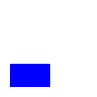

Тесты для draw_rectangle пройдены успешно!


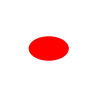

Тесты для draw_oval пройдены успешно!


In [25]:
from matplotlib.patches import Ellipse

def draw_rectangle(m, n, a, b, bg_color, rect_color):
    fig, ax = plt.subplots(figsize=(m/100, n/100))
    ax.set_xlim(0, m)
    ax.set_ylim(0, n)
    ax.set_facecolor(bg_color)
    rectangle = plt.Rectangle((0, 0), a, b, color=rect_color)
    ax.add_patch(rectangle)
    plt.axis('off')
    plt.show()

    
def draw_ellipse(m, n, a, b, bg_color, oval_color):
    fig, ax = plt.subplots(figsize=(m/100, n/100))
    ax.set_xlim(0, m)
    ax.set_ylim(0, n)
    ax.set_facecolor(bg_color)
    ellipse = Ellipse((m/2, n/2), a, b, color=oval_color)
    ax.add_patch(ellipse)
    plt.axis('off')
    plt.show()

    
def test_draw_rectangle():
    draw_rectangle(100, 100, 50, 30, "white", "blue")
    print("Тесты для draw_rectangle пройдены успешно!")

def test_draw_ellipse():
    draw_ellipse(100, 100, 50, 30, "white", "red")
    print("Тесты для draw_oval пройдены успешно!")


test_draw_rectangle()
test_draw_ellipse()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [36]:
def analysis(series, p):
    mean = np.mean(series)
    variance = np.var(series)
    std_dev = np.sqrt(variance)
    
    rolling_mean_series = np.convolve(series, np.ones(p)/p, mode='valid')
    
    local_max = np.logical_and(series > np.roll(series, 1), series > np.roll(series, -1))
    local_min = np.logical_and(series < np.roll(series, 1), series < np.roll(series, -1))
    
    return mean, variance, std_dev, rolling_mean_series, local_max, local_min

def test_time_series_analysis():
    series = np.array([1, 3, 2, 5, 4, 7, 6, 8, 9, 7, 5, 4, 6, 8, 7])
    
    mean, variance, std_dev, rolling_mean, local_max, local_min = analysis(series, 3)
    assert np.isclose(mean, 5.466666666666667)
    assert np.isclose(variance, 5.0488888888888885)
    assert np.isclose(std_dev, 2.246973272847029)
    assert np.allclose(rolling_mean, [2.        , 3.33333333, 3.66666667, 5.33333333, 5.66666667, 7.        , 7.66666667, 8.        , 7.        , 5.33333333, 5.        , 6.        , 7.        ])
    assert np.array_equal(local_max, [False,  True, False,  True, False,  True, False, False,  True, False, False, False, False,  True, False])
    assert np.array_equal(local_min, [True, False,  True, False,  True, False,  True, False, False, False, False,  True, False, False, False])

    print("Тесты пройдены успешно!")


test_time_series_analysis()

Тесты пройдены успешно!


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [37]:
def one_hot_encoding(labels, num_classes=None):
    if num_classes is None:
        num_classes = np.max(labels) + 1
    return np.eye(num_classes)[labels]


labels = [0, 2, 3, 0]
one_hot_encoded = one_hot_encoding(labels)
print(one_hot_encoded)

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
